<a href="https://colab.research.google.com/github/Sh-Dulguun/Dulguun.github.io/blob/master/Iris_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Problem 1] Acquisition of data**
Let's read the iris dataset while referring to the following document.

X After reading the data, store the explanatory variables in Pandas DataFrame type variables like the one below . See below for column names.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

data = load_iris()
X = pd.DataFrame(data=data.data, columns=data.feature_names)
Y = pd.DataFrame(data=data.target, columns=['Species'])
print(X)
print(Y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     Species
0          0
1          0
2

# **[Problem 2] Combining data**
Create X, ya DataFrame type variable that combines the prepared in question 1 . dfCombining them makes them easier to handle. dfI will use this from now on .

In [3]:
X = pd.concat([X,Y], axis=1)
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


# **[Question 3] Confirmation of data**
Check what kind of data you are dealing with this time. Please do the following four things.

1.   Display the first to fourth samples and see what each feature is like. (Numeric data or character data, etc.)
2.   Print the total number of samples per label.
1.   Check if there are missing values ​​in the features.
2.   Display the mean value, standard deviation, and quartile of the feature value at once.

Let's use DataFrame methods .head(), .info(), .describe(), .isnull(), .sum()and Series methods ..value_counts

In [4]:
print(X.head(4))
print(X.info())
print(X.describe())
print('4th sample: {}'.format(X.loc[4]))
print('total number of samples for each label: {}'.format(X.value_counts('Species')))
count = np.count_nonzero(X.isnull())
print('There is {} missing values.'.format(count))
print('sum is: {}'.format(X.sum()))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  

# **[Problem 5] Extract necessary data**
We will see how to extract the data we need from the DataFrame. Please do the following:

1.   sepal_widthextract the columns of the in two different ways
2.   50番目から99番目までextract the data of
1.   petal_length50番目から99番目までExtract data for columns
2.   petal_width0.2Extract data with values ​​of

.loc.ilocYou will use or . Please explain how the two are different.
Note) In column extraction, ix is ​​deprecated in pandas 1.0.0 introduced in February 2020

In [7]:
sepal_width_loc = X.loc[:,'sepal width (cm)']
sepal_width_iloc = X.iloc[:,1]
print(sepal_width_loc)

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64


# **[Question 6] Creating a diagram**
It is important to visualize and confirm the data. Please do the following three things. In addition to Matplotlib, seaborn is often used as a plotting library.

1.   Make a pie chart of the number of samples per label (displayed as a percentage)
2.    Select features one by one and use a boxplot to visualize the distribution of data for each label
1.   Select features one by one and visualize the distribution of data for each label using a violin diagram

Boxplots and violin plots display similar plots. Please explain how they are different and what are the advantages of each.

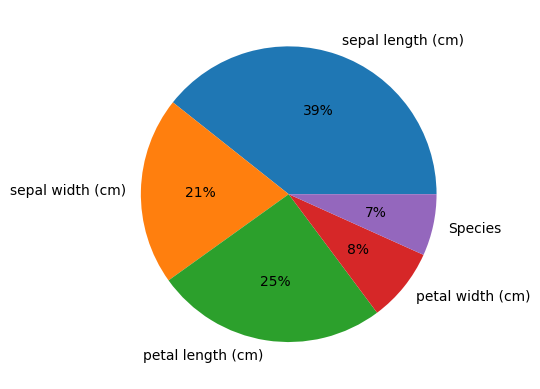

In [8]:
import matplotlib.pyplot as plt
labels = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','Species']
fig, ax = plt.subplots()
ax.pie(X.sum(), labels = labels, autopct='%1.0f%%')
plt.show()

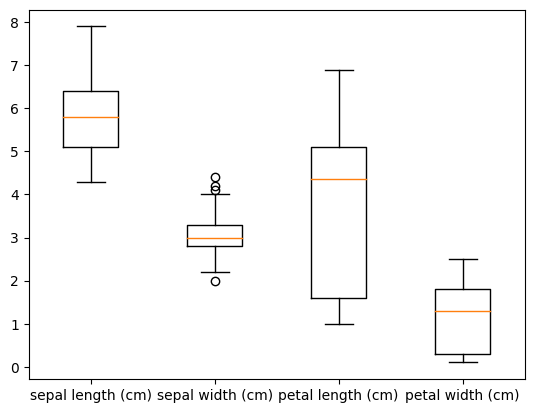

In [10]:
fig,ax = plt.subplots()
labels = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
ax.boxplot((X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],X.iloc[:,3]),labels=labels)
plt.show()

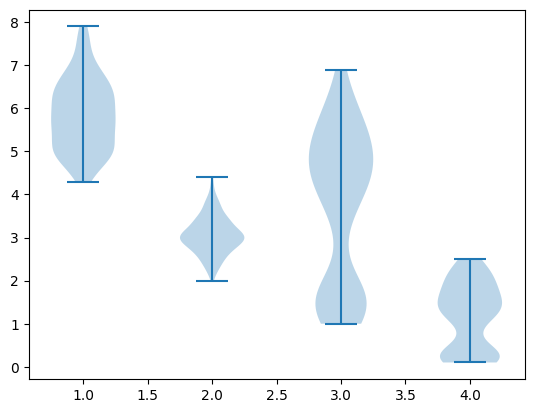

In [11]:
fig,ax = plt.subplots()
ax.violinplot((X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],X.iloc[:,3]))
plt.show()

# **[Problem 7] Checking the relationship between feature values**
Let's look at the relationships between features. Please do the following four things.

*   Create a scatterplot matrix that displays all feature combinations at once.
*   Create a correlation coefficient matrix for the four features
*   Create a heatmap of the correlation coefficient matrix (one)

.loc.ilocYou will use or . Please explain how the two are different.
Note) In column extraction, ix is ​​deprecated in pandas 1.0.0 introduced in February 2020

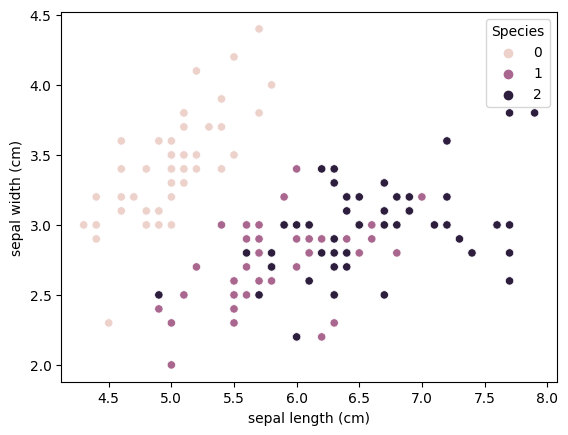

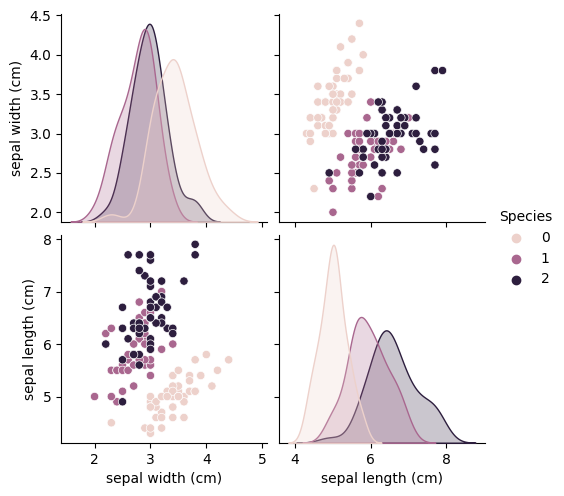

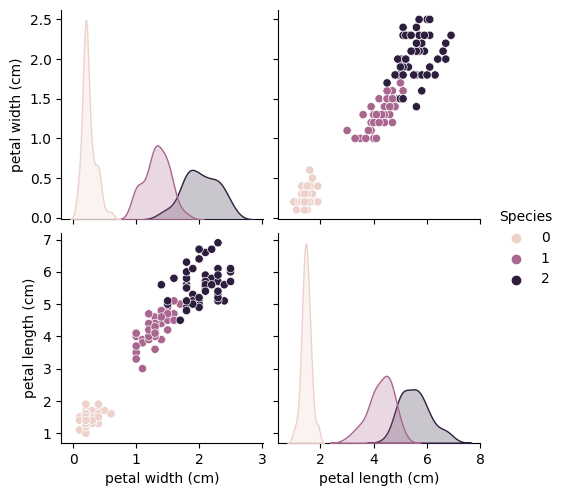

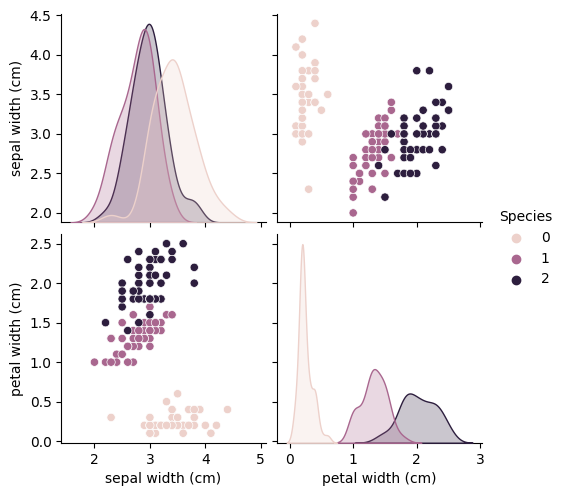

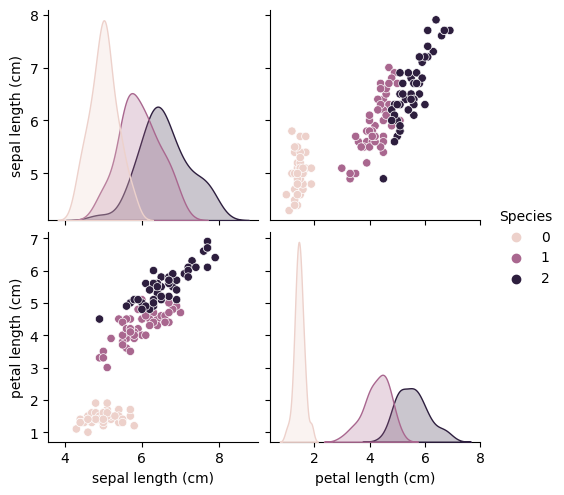

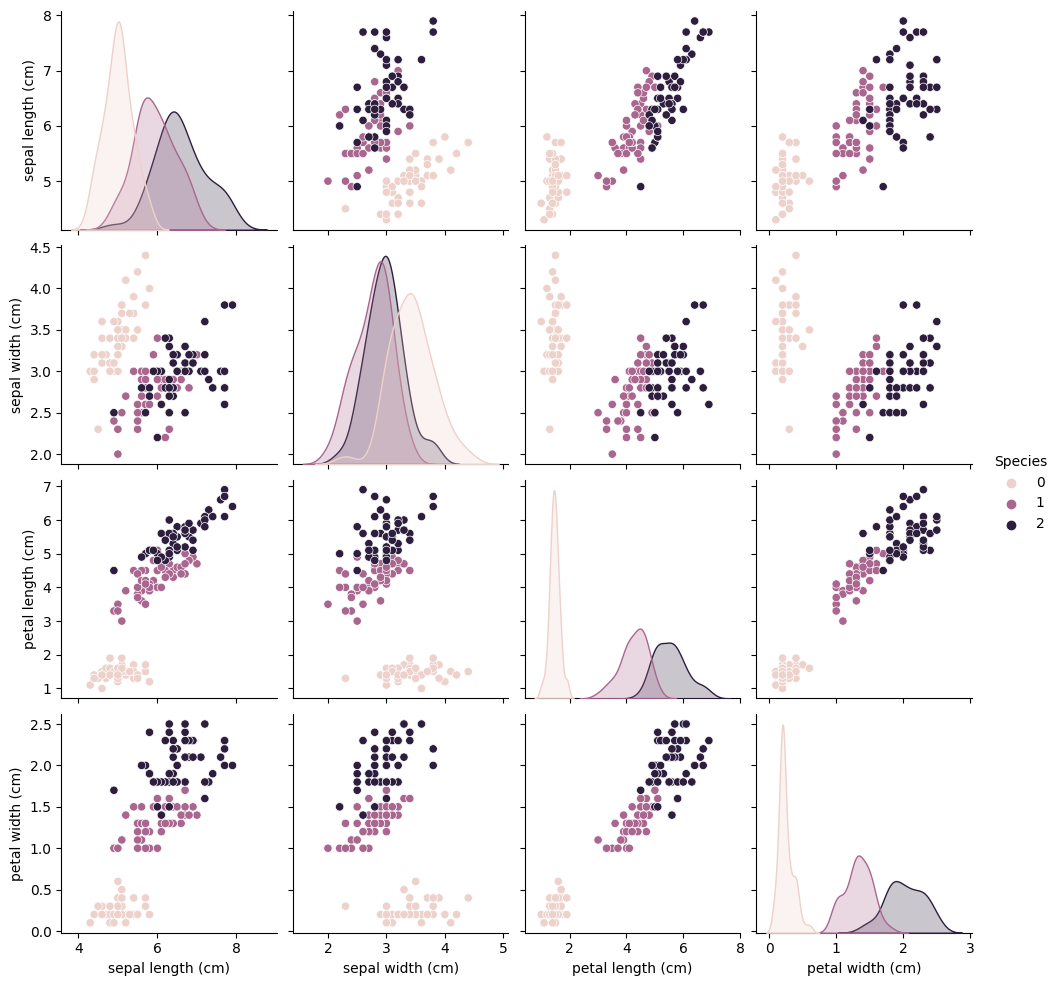

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
Species                     0.782561         -0.426658           0.949035   

                   petal width (cm)   Species  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
Species                    0.956547  1.000000  


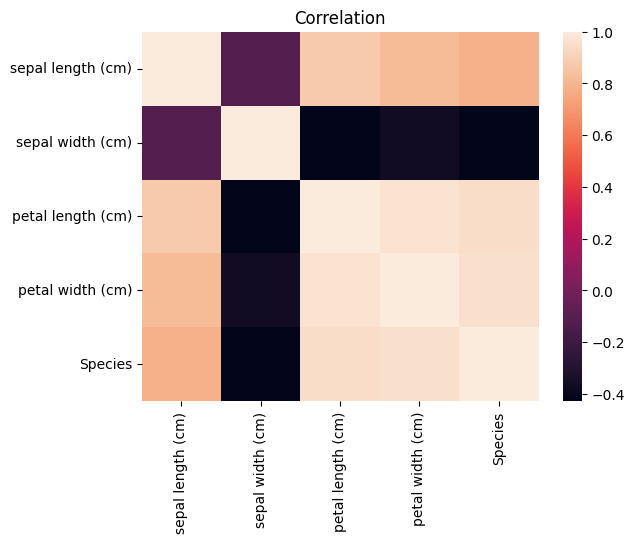

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=X, x='sepal length (cm)', y='sepal width (cm)', hue='Species')
plt.show()

sns.pairplot(data=X, vars=["sepal width (cm)", "sepal length (cm)"], hue='Species', kind='scatter')
plt.show()

sns.pairplot(data=X, vars=["petal width (cm)", "petal length (cm)"], hue='Species', kind='scatter')
plt.show()

sns.pairplot(data=X, vars=["sepal width (cm)", "petal width (cm)"], hue='Species', kind='scatter')
plt.show()

sns.pairplot(data=X, vars=["sepal length (cm)", "petal length (cm)"], hue='Species', kind='scatter')
plt.show()

sns.pairplot(data=X, hue='Species', kind='scatter')
plt.show()

corr = X.corr(method='pearson')
print(corr)

sns.heatmap(corr)
plt.title('Correlation')
plt.show()

# **[Question 8] Explaining the results of visualized graphs and tables**
When exploring data, it is important to state (+discuss) the results. Please explain what you can learn from the charts and diagrams you have created so far.

For example, look at the scatterplot matrix and explain how the three types of irises are different.

In [15]:
print('Result from the matrix and figures:\
    1. 0th class is very different from 1 and 2 class with all features. \
    2. 1 and 2 classes are similar with sepal length and sepal width \
    3. We can distinguish 1 and 2 classes with pedal length and pedal width.')

Result from the matrix and figures:    1. 0th class is very different from 1 and 2 class with all features.     2. 1 and 2 classes are similar with sepal length and sepal width     3. We can distinguish 1 and 2 classes with pedal length and pedal width.
